In [128]:
import pyspark as spark
import numpy as np
import pandas as pd
import sklearn
import geopandas as gpd 
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
crash = pd.read_csv('../data/Traffic_Crashes_-_Crashes.csv')

In [66]:
vehicles = pd.read_csv('../data/Traffic_Crashes_-_Vehicles.csv')

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [67]:
people = pd.read_csv('../data/Traffic_Crashes_-_People.csv')

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [77]:
people=people[people['INJURY_CLASSIFICATION'].isnull()==False]

In [78]:
people.shape

(1142379, 30)

In [79]:
severe_injury =people[people['INJURY_CLASSIFICATION'].isin(['FATAL','INCAPACITATING INJURY'])]

In [80]:
severe_injury.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [81]:
severe_injury[severe_injury['INJURY_CLASSIFICATION']== 'FATAL']

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
504,O838563,DRIVER,362c12430744ace0e1bd90e95689790166481ef62c096f...,JD145123,795783.0,02/08/2020 09:47:00 PM,NaN,CHICAGO,IL,60639,...,NaN,NONE,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
5130,O876584,PEDESTRIAN,156c7876ed4bc4a5885189778b871d0d304477d379a815...,JD217176,NaN,04/25/2020 08:34:00 PM,NaN,UNKNOWN,NaN,NaN,...,NaN,NaN,NaN,NaN,CROSSING - NO CONTROLS (AT INTERSECTION),NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED,NaN,NaN
6599,O852152,BICYCLE,fdc5d4d1299102e75fd8c7997ea5c343a0b5e62a4f7bde...,JD168667,NaN,02/29/2020 12:35:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,REMOVED BY EMS,CROSSING - NO CONTROLS (NOT AT INTERSECTION),NO CONTRASTING CLOTHING,IN ROADWAY,NaN,NaN,NaN
8830,O882908,DRIVER,80b1325c9066353b979677290e930e876ceadb355a6469...,JD230760,837598.0,05/12/2020 07:00:00 PM,NaN,FLOSSMOOR,IL,60422,...,NaN,UNKNOWN,UNKNOWN,REMOVED BY EMS,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
10062,O853602,DRIVER,08d8b1747ca790951f856dcd6bf1e45aebf16cc6a0b5d1...,JD170887,810042.0,03/02/2020 02:07:00 AM,NaN,TINLEY PARK,IL,60477,...,NaN,TOO FAST FOR CONDITIONS,NOT OBSCURED,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131904,P252255,PASSENGER,a7b66672d32baa415862a2c1b777d5eb4f4ea7dd596631...,NaN,1065852.0,06/21/2021 09:44:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136348,O1125801,DRIVER,cecfca2ab8941e918a9221cb1bcf414a7f8c23abdfa109...,NaN,1067876.0,06/24/2021 11:15:00 PM,NaN,CHICAGO,IL,60653,...,NaN,OTHER,UNKNOWN,REMOVED BY EMS,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1137626,O1126307,DRIVER,98f24fedc8914d65e3fd08b1d3e6c1ab731b163bf5d19b...,NaN,1068359.0,06/25/2021 02:27:00 PM,NaN,CHICAGO,IL,60619,...,NaN,OTHER,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1139332,O1127533,DRIVER,f1f084a5a927eb66b19e82b2460b328d33de503a70428a...,NaN,1069545.0,06/27/2021 10:54:00 AM,NaN,BERWYN,IL,60402,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [82]:
people=people[people['INJURY_CLASSIFICATION'].isnull()==False]

In [83]:
clean_people=people[['CRASH_RECORD_ID',"VEHICLE_ID",'CRASH_DATE','INJURY_CLASSIFICATION',"AIRBAG_DEPLOYED",'DRIVER_ACTION','PEDPEDAL_ACTION','BAC_RESULT VALUE','CELL_PHONE_USE']]

In [84]:
clean_people.shape

(1142379, 9)

In [85]:
clean_vehicles = vehicles[['CRASH_UNIT_ID',"CRASH_RECORD_ID","CRASH_DATE",'MAKE','MODEL','VEHICLE_TYPE','VEHICLE_DEFECT','FIRST_CONTACT_POINT','FIRE_I']]

In [86]:
clean_vehicles.shape

(1057474, 9)

In [87]:
crash_clean =crash[['CRASH_RECORD_ID','CRASH_DATE','WEATHER_CONDITION','LIGHTING_CONDITION','LANE_CNT','ROADWAY_SURFACE_COND','ROAD_DEFECT','TRAFFICWAY_TYPE','STREET_NO','STREET_NAME','BEAT_OF_OCCURRENCE','WORK_ZONE_TYPE','INJURIES_TOTAL','MOST_SEVERE_INJURY','INJURIES_FATAL','CRASH_MONTH','CRASH_DAY_OF_WEEK','TRAFFICWAY_TYPE','CRASH_HOUR','LATITUDE','LONGITUDE','LOCATION']]

In [88]:
crash_clean.shape

(517282, 22)

In [89]:
mergeddf=clean_people.merge(clean_vehicles,on='CRASH_RECORD_ID').merge(crash_clean,on='CRASH_RECORD_ID')

In [90]:
mergeddf.describe()

,VEHICLE_ID,BAC_RESULT VALUE,CRASH_UNIT_ID,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,INJURIES_TOTAL,INJURIES_FATAL,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,LATITUDE,LONGITUDE
count,2.363271e+06,3512.000000,2.412776e+06,9.296760e+05,2.412776e+06,2.412752e+06,2.412776e+06,2.412776e+06,2.412776e+06,2.412776e+06,2.412776e+06,2.399324e+06,2.399324e+06
mean,5.402716e+05,0.165849,5.676385e+05,9.349354e+00,3.610831e+03,1.230165e+03,3.013156e-01,2.051164e-03,6.590377e+00,4.148680e+00,1.350763e+01,4.185222e+01,-8.766854e+01
std,3.077081e+05,0.098596,3.259501e+05,2.110810e+03,2.886118e+03,7.038798e+02,8.372557e-01,5.158671e-02,3.423331e+00,1.988100e+00,5.394394e+00,4.496020e-01,9.267125e-01
min,2.000000e+00,0.000000,2.000000e+00,0.000000e+00,0.000000e+00,1.110000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-8.793476e+01
25%,2.752500e+05,0.120000,2.850108e+05,2.000000e+00,1.200000e+03,7.110000e+02,0.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,1.000000e+01,4.178215e+01,-8.772162e+01
50%,5.421820e+05,0.170000,5.697720e+05,2.000000e+00,3.136000e+03,1.134000e+03,0.000000e+00,0.000000e+00,7.000000e+00,4.000000e+00,1.400000e+01,4.187489e+01,-8.767357e+01
75%,8.059645e+05,0.210000,8.496552e+05,4.000000e+00,5.518000e+03,1.814000e+03,0.000000e+00,0.000000e+00,1.000000e+01,6.000000e+00,1.700000e+01,4.192198e+01,-8.763256e+01
max,1.071291e+06,1.000000,1.129364e+06,1.191625e+06,4.511000e+05,6.100000e+03,2.100000e+01,4.000000e+00,1.200000e+01,7.000000e+00,2.300000e+01,4.202278e+01,0.000000e+00


In [91]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412776 entries, 0 to 2412775
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CRASH_RECORD_ID        object 
 1   VEHICLE_ID             float64
 2   CRASH_DATE_x           object 
 3   INJURY_CLASSIFICATION  object 
 4   AIRBAG_DEPLOYED        object 
 5   DRIVER_ACTION          object 
 6   PEDPEDAL_ACTION        object 
 7   BAC_RESULT VALUE       float64
 8   CELL_PHONE_USE         object 
 9   CRASH_UNIT_ID          int64  
 10  CRASH_DATE_y           object 
 11  MAKE                   object 
 12  MODEL                  object 
 13  VEHICLE_TYPE           object 
 14  VEHICLE_DEFECT         object 
 15  FIRST_CONTACT_POINT    object 
 16  FIRE_I                 object 
 17  CRASH_DATE             object 
 18  WEATHER_CONDITION      object 
 19  LIGHTING_CONDITION     object 
 20  LANE_CNT               float64
 21  ROADWAY_SURFACE_COND   object 
 22  ROAD_DEFECT       

In [92]:
mergeddf['INJURIES_FATAL'].value_counts()

0.0    2408380
1.0       3991
2.0        297
3.0         68
4.0         40
Name: INJURIES_FATAL, dtype: int64

In [93]:
fataldf = mergeddf[mergeddf["INJURIES_FATAL"]>0]

In [94]:
fataldf

,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE_x,INJURY_CLASSIFICATION,AIRBAG_DEPLOYED,DRIVER_ACTION,PEDPEDAL_ACTION,BAC_RESULT VALUE,CELL_PHONE_USE,CRASH_UNIT_ID,...,INJURIES_TOTAL,MOST_SEVERE_INJURY,INJURIES_FATAL,CRASH_MONTH,CRASH_DAY_OF_WEEK,TRAFFICWAY_TYPE,CRASH_HOUR,LATITUDE,LONGITUDE,LOCATION
1591,362c12430744ace0e1bd90e95689790166481ef62c096f...,795768.0,02/08/2020 09:47:00 PM,NONINCAPACITATING INJURY,"DEPLOYED, FRONT",TOO FAST FOR CONDITIONS,NaN,NaN,NaN,838562,...,7.0,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091)
1592,362c12430744ace0e1bd90e95689790166481ef62c096f...,795768.0,02/08/2020 09:47:00 PM,NONINCAPACITATING INJURY,"DEPLOYED, FRONT",TOO FAST FOR CONDITIONS,NaN,NaN,NaN,838563,...,7.0,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091)
1593,362c12430744ace0e1bd90e95689790166481ef62c096f...,795768.0,02/08/2020 09:47:00 PM,NONINCAPACITATING INJURY,"DEPLOYED, FRONT",TOO FAST FOR CONDITIONS,NaN,NaN,NaN,838564,...,7.0,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091)
1594,362c12430744ace0e1bd90e95689790166481ef62c096f...,795783.0,02/08/2020 09:47:00 PM,FATAL,"DEPLOYED, COMBINATION",NONE,NaN,NaN,NaN,838562,...,7.0,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091)
1595,362c12430744ace0e1bd90e95689790166481ef62c096f...,795783.0,02/08/2020 09:47:00 PM,FATAL,"DEPLOYED, COMBINATION",NONE,NaN,NaN,NaN,838563,...,7.0,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408139,96ba417b277d724284d2742aeedcbc399f23c29be9709e...,1069836.0,06/27/2021 07:26:00 PM,FATAL,DEPLOYMENT UNKNOWN,UNKNOWN,NaN,NaN,NaN,1127880,...,2.0,FATAL,1.0,6,1,ONE-WAY,19,41.871624,-87.718280,POINT (-87.718280084921 41.871623759129)
2408140,96ba417b277d724284d2742aeedcbc399f23c29be9709e...,NaN,06/27/2021 07:26:00 PM,"REPORTED, NOT EVIDENT",NaN,UNKNOWN,UNKNOWN/NA,NaN,NaN,1127843,...,2.0,FATAL,1.0,6,1,ONE-WAY,19,41.871624,-87.718280,POINT (-87.718280084921 41.871623759129)
2408141,96ba417b277d724284d2742aeedcbc399f23c29be9709e...,NaN,06/27/2021 07:26:00 PM,"REPORTED, NOT EVIDENT",NaN,UNKNOWN,UNKNOWN/NA,NaN,NaN,1127844,...,2.0,FATAL,1.0,6,1,ONE-WAY,19,41.871624,-87.718280,POINT (-87.718280084921 41.871623759129)
2408142,96ba417b277d724284d2742aeedcbc399f23c29be9709e...,NaN,06/27/2021 07:26:00 PM,"REPORTED, NOT EVIDENT",NaN,UNKNOWN,UNKNOWN/NA,NaN,NaN,1127845,...,2.0,FATAL,1.0,6,1,ONE-WAY,19,41.871624,-87.718280,POINT (-87.718280084921 41.871623759129)


In [95]:
fataldf.describe()

,VEHICLE_ID,BAC_RESULT VALUE,CRASH_UNIT_ID,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,INJURIES_TOTAL,INJURIES_FATAL,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,LATITUDE,LONGITUDE
count,3.749000e+03,50.00000,4.396000e+03,1297.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4387.000000,4387.000000
mean,7.193862e+05,0.07240,7.531326e+05,3.025443,3643.397862,1063.680619,2.992721,1.125796,6.543904,4.137625,11.912648,41.830237,-87.673191
std,3.002430e+05,0.07981,3.147290e+05,5.534555,3063.284019,594.239503,2.195857,0.442208,3.064959,1.894591,8.127769,0.078718,0.054669
min,9.250000e+03,0.00000,9.672000e+03,0.000000,1.000000,111.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41.647709,-87.933977
25%,4.458340e+05,0.00000,4.654368e+05,2.000000,800.000000,632.000000,1.000000,1.000000,5.000000,3.000000,3.000000,41.765291,-87.711428
50%,8.356370e+05,0.07000,8.724980e+05,2.000000,3130.000000,1012.000000,2.000000,1.000000,6.000000,5.000000,13.000000,41.846954,-87.678600
75%,9.701990e+05,0.11750,1.017374e+06,4.000000,5721.000000,1232.000000,5.000000,1.000000,9.000000,5.000000,20.000000,41.880986,-87.636723
max,1.069836e+06,0.30000,1.127880e+06,99.000000,13615.000000,2534.000000,10.000000,4.000000,12.000000,7.000000,23.000000,42.015842,-87.527618


In [96]:
chimap= gpd.read_file('../data/Maps/geo_export_501125fe-60a6-4852-a5cf-5ef96eb419a9.shp')

In [97]:
geometry = [Point(xy) for xy in zip(fataldf.LONGITUDE,fataldf.LATITUDE)]

In [98]:
gdf = gpd.GeoDataFrame(fataldf,crs={'init':'epsg:4326'},geometry = geometry)

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

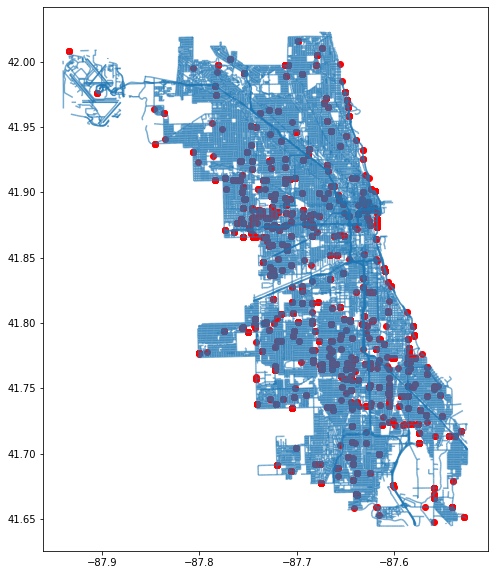

In [99]:
fig,axs=plt.subplots(figsize=(10,10))
ax1=chimap.plot(ax=axs,alpha = .6)
ax1.set_xlim()
ax1.set_ylim()

gdf.plot(ax=ax1,color = 'red')

In [100]:
boundmap= gpd.read_file('../data/Maps/Neighborhoods_2012b.shp')

In [101]:
gdf = gpd.GeoDataFrame(fataldf,crs={'init':'epsg:26916'},geometry = geometry)

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

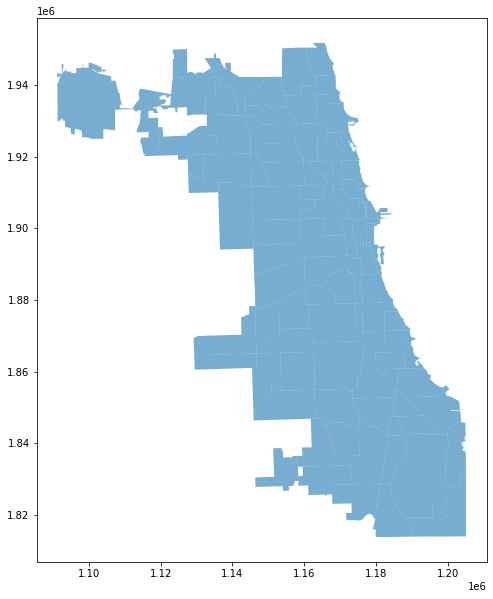

In [102]:
fig,axs= plt.subplots(figsize=(10,10))
ax1=boundmap.plot(ax=axs,alpha = .6)
ax1.set_xlim()
ax1.set_ylim()

gdf.plot(ax=ax1,color = 'red')

In [103]:
fataldf['CRASH_MONTH'].value_counts()

5     845
7     462
6     452
11    368
10    357
3     343
8     334
9     287
4     276
1     274
12    252
2     146
Name: CRASH_MONTH, dtype: int64

In [104]:
fataldf['CRASH_HOUR'].value_counts()

0     560
23    392
21    320
22    221
1     219
16    213
13    196
12    196
20    195
19    189
2     187
10    173
3     162
18    162
4     146
17    142
15    123
11    117
9     113
7      92
14     89
5      81
8      78
6      30
Name: CRASH_HOUR, dtype: int64

In [105]:
fataldf['STREET_NAME'].value_counts()

WESTERN AVE          534
HALSTED ST           187
CICERO AVE           173
COTTAGE GROVE AVE    162
ASHLAND AVE          131
                    ... 
98TH PL                1
KANST DR               1
PAYNE DR               1
WARWICK AVE            1
HAMLIN BLVD            1
Name: STREET_NAME, Length: 209, dtype: int64

In [106]:
fataldf["MAKE"].value_counts()

CHEVROLET                      472
FORD                           457
HONDA                          267
NISSAN                         240
UNKNOWN                        206
                              ... 
INTERNATIONAL TRAILER CORP.      2
INTERNATIONAL COACH MFG.         2
CUSHMAN TURF-OMC LINCOLN         1
OLDSMOBILE                       1
F. & H. MFG. CO.                 1
Name: MAKE, Length: 73, dtype: int64

In [107]:
fataldf['LANE_CNT'].value_counts()

2.0     520
4.0     382
3.0     132
1.0     127
0.0      63
6.0      27
5.0      19
8.0      19
99.0      4
7.0       4
Name: LANE_CNT, dtype: int64

In [108]:
fataldf["BEAT_OF_OCCURRENCE"].value_counts()

1225.0    478
733.0     125
632.0     123
1232.0    103
815.0      94
         ... 
1724.0      1
1224.0      1
221.0       1
1612.0      1
831.0       1
Name: BEAT_OF_OCCURRENCE, Length: 207, dtype: int64

In [109]:
fataldf['ROAD_DEFECT'].value_counts()

NO DEFECTS         3936
UNKNOWN             392
WORN SURFACE         27
OTHER                23
SHOULDER DEFECT      12
RUT, HOLES            6
Name: ROAD_DEFECT, dtype: int64

In [110]:
fataldf['LIGHTING_CONDITION'].value_counts()

DARKNESS, LIGHTED ROAD    2407
DAYLIGHT                  1685
DARKNESS                   161
DUSK                        89
DAWN                        35
UNKNOWN                     19
Name: LIGHTING_CONDITION, dtype: int64

In [111]:
fataldf['FIRST_CONTACT_POINT'].value_counts()

OTHER                777
FRONT                681
TOTAL (ALL AREAS)    384
SIDE-LEFT            277
UNKNOWN              243
FRONT-LEFT           219
REAR-LEFT            203
SIDE-RIGHT           177
REAR                 165
ROOF                 148
FRONT-RIGHT          146
REAR-RIGHT            50
UNDER CARRIAGE        40
NONE                  29
Name: FIRST_CONTACT_POINT, dtype: int64

In [112]:
fataldf['WEATHER_CONDITION'].value_counts()

CLEAR              3813
RAIN                352
CLOUDY/OVERCAST      90
SNOW                 65
UNKNOWN              64
FOG/SMOKE/HAZE        8
OTHER                 4
Name: WEATHER_CONDITION, dtype: int64

In [113]:
fataldf['AIRBAG_DEPLOYED'].value_counts()

DEPLOYED, COMBINATION                     986
DID NOT DEPLOY                            895
DEPLOYMENT UNKNOWN                        692
DEPLOYED, FRONT                           541
NOT APPLICABLE                            536
DEPLOYED, SIDE                            106
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)      3
Name: AIRBAG_DEPLOYED, dtype: int64

In [114]:
fataldf['CRASH_DATE_x'].value_counts()

05/27/2021 12:02:00 AM    441
11/26/2020 11:03:00 PM    108
11/05/2020 10:25:00 AM     80
03/03/2018 07:11:00 AM     64
07/19/2020 04:45:00 PM     64
                         ... 
10/26/2019 04:30:00 AM      1
03/15/2021 09:41:00 PM      1
05/31/2021 03:20:00 PM      1
09/18/2020 07:35:00 AM      1
09/03/2020 12:05:00 PM      1
Name: CRASH_DATE_x, Length: 506, dtype: int64

In [115]:
fataldf[fataldf['CRASH_DATE_x']=='05/27/2021 12:02:00 AM']

,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE_x,INJURY_CLASSIFICATION,AIRBAG_DEPLOYED,DRIVER_ACTION,PEDPEDAL_ACTION,BAC_RESULT VALUE,CELL_PHONE_USE,CRASH_UNIT_ID,...,MOST_SEVERE_INJURY,INJURIES_FATAL,CRASH_MONTH,CRASH_DAY_OF_WEEK,TRAFFICWAY_TYPE,CRASH_HOUR,LATITUDE,LONGITUDE,LOCATION,geometry
2345077,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345078,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1103996,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345079,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1114200,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345080,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1114201,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345081,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1114202,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345513,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051079.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,NOT APPLICABLE,NaN,NaN,NaN,NaN,1108038,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345514,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051079.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,NOT APPLICABLE,NaN,NaN,NaN,NaN,1108039,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345515,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051079.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,NOT APPLICABLE,NaN,NaN,NaN,NaN,1108040,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345516,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051079.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,NOT APPLICABLE,NaN,NaN,NaN,NaN,1108041,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)


In [116]:
crash_day = fataldf[fataldf['CRASH_DATE_x']=='05/27/2021 12:02:00 AM']

In [117]:
crash_day

,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE_x,INJURY_CLASSIFICATION,AIRBAG_DEPLOYED,DRIVER_ACTION,PEDPEDAL_ACTION,BAC_RESULT VALUE,CELL_PHONE_USE,CRASH_UNIT_ID,...,MOST_SEVERE_INJURY,INJURIES_FATAL,CRASH_MONTH,CRASH_DAY_OF_WEEK,TRAFFICWAY_TYPE,CRASH_HOUR,LATITUDE,LONGITUDE,LOCATION,geometry
2345077,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345078,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1103996,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345079,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1114200,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345080,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1114201,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345081,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1114202,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345513,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051079.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,NOT APPLICABLE,NaN,NaN,NaN,NaN,1108038,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345514,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051079.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,NOT APPLICABLE,NaN,NaN,NaN,NaN,1108039,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345515,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051079.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,NOT APPLICABLE,NaN,NaN,NaN,NaN,1108040,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345516,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051079.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,NOT APPLICABLE,NaN,NaN,NaN,NaN,1108041,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)


In [118]:
crash_day.drop_duplicates(subset= ['VEHICLE_ID'])

,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE_x,INJURY_CLASSIFICATION,AIRBAG_DEPLOYED,DRIVER_ACTION,PEDPEDAL_ACTION,BAC_RESULT VALUE,CELL_PHONE_USE,CRASH_UNIT_ID,...,MOST_SEVERE_INJURY,INJURIES_FATAL,CRASH_MONTH,CRASH_DAY_OF_WEEK,TRAFFICWAY_TYPE,CRASH_HOUR,LATITUDE,LONGITUDE,LOCATION,geometry
2345077,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047229.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,NaN,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345119,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047236.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,"DEPLOYED, COMBINATION",NaN,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345161,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1056926.0,05/27/2021 12:02:00 AM,NO INDICATION OF INJURY,"DEPLOYED, COMBINATION",TOO FAST FOR CONDITIONS,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345182,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1056927.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,"DEPLOYED, COMBINATION",OTHER,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345203,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1056930.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,OTHER,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345308,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1047239.0,05/27/2021 12:02:00 AM,NO INDICATION OF INJURY,"DEPLOYED, COMBINATION",TOO FAST FOR CONDITIONS,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345371,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051075.0,05/27/2021 12:02:00 AM,NO INDICATION OF INJURY,"DEPLOYED, COMBINATION",TOO FAST FOR CONDITIONS,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345392,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051076.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,"DEPLOYED, COMBINATION",OTHER,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)
2345413,ca71bf45d00e22775995550b55d9e9a51f83b9572b9383...,1051079.0,05/27/2021 12:02:00 AM,NONINCAPACITATING INJURY,DID NOT DEPLOY,OTHER,NaN,NaN,NaN,1103995,...,FATAL,1.0,5,5,DIVIDED - W/MEDIAN BARRIER,0,41.876764,-87.686174,POINT (-87.686174055897 41.87676370496),POINT (-87.68617 41.87676)


In [119]:
crash_day['VEHICLE_ID'].value_counts()

1047236.0    63
1051079.0    63
1056930.0    63
1056927.0    63
1051076.0    63
1047229.0    63
1056926.0    21
1051075.0    21
1047239.0    21
Name: VEHICLE_ID, dtype: int64

In [120]:
fataldf

,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE_x,INJURY_CLASSIFICATION,AIRBAG_DEPLOYED,DRIVER_ACTION,PEDPEDAL_ACTION,BAC_RESULT VALUE,CELL_PHONE_USE,CRASH_UNIT_ID,...,MOST_SEVERE_INJURY,INJURIES_FATAL,CRASH_MONTH,CRASH_DAY_OF_WEEK,TRAFFICWAY_TYPE,CRASH_HOUR,LATITUDE,LONGITUDE,LOCATION,geometry
1591,362c12430744ace0e1bd90e95689790166481ef62c096f...,795768.0,02/08/2020 09:47:00 PM,NONINCAPACITATING INJURY,"DEPLOYED, FRONT",TOO FAST FOR CONDITIONS,NaN,NaN,NaN,838562,...,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091),POINT (-87.70613 41.87744)
1592,362c12430744ace0e1bd90e95689790166481ef62c096f...,795768.0,02/08/2020 09:47:00 PM,NONINCAPACITATING INJURY,"DEPLOYED, FRONT",TOO FAST FOR CONDITIONS,NaN,NaN,NaN,838563,...,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091),POINT (-87.70613 41.87744)
1593,362c12430744ace0e1bd90e95689790166481ef62c096f...,795768.0,02/08/2020 09:47:00 PM,NONINCAPACITATING INJURY,"DEPLOYED, FRONT",TOO FAST FOR CONDITIONS,NaN,NaN,NaN,838564,...,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091),POINT (-87.70613 41.87744)
1594,362c12430744ace0e1bd90e95689790166481ef62c096f...,795783.0,02/08/2020 09:47:00 PM,FATAL,"DEPLOYED, COMBINATION",NONE,NaN,NaN,NaN,838562,...,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091),POINT (-87.70613 41.87744)
1595,362c12430744ace0e1bd90e95689790166481ef62c096f...,795783.0,02/08/2020 09:47:00 PM,FATAL,"DEPLOYED, COMBINATION",NONE,NaN,NaN,NaN,838563,...,FATAL,1.0,2,7,FOUR WAY,21,41.877436,-87.706134,POINT (-87.706134300119 41.877436205091),POINT (-87.70613 41.87744)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408139,96ba417b277d724284d2742aeedcbc399f23c29be9709e...,1069836.0,06/27/2021 07:26:00 PM,FATAL,DEPLOYMENT UNKNOWN,UNKNOWN,NaN,NaN,NaN,1127880,...,FATAL,1.0,6,1,ONE-WAY,19,41.871624,-87.718280,POINT (-87.718280084921 41.871623759129),POINT (-87.71828 41.87162)
2408140,96ba417b277d724284d2742aeedcbc399f23c29be9709e...,NaN,06/27/2021 07:26:00 PM,"REPORTED, NOT EVIDENT",NaN,UNKNOWN,UNKNOWN/NA,NaN,NaN,1127843,...,FATAL,1.0,6,1,ONE-WAY,19,41.871624,-87.718280,POINT (-87.718280084921 41.871623759129),POINT (-87.71828 41.87162)
2408141,96ba417b277d724284d2742aeedcbc399f23c29be9709e...,NaN,06/27/2021 07:26:00 PM,"REPORTED, NOT EVIDENT",NaN,UNKNOWN,UNKNOWN/NA,NaN,NaN,1127844,...,FATAL,1.0,6,1,ONE-WAY,19,41.871624,-87.718280,POINT (-87.718280084921 41.871623759129),POINT (-87.71828 41.87162)
2408142,96ba417b277d724284d2742aeedcbc399f23c29be9709e...,NaN,06/27/2021 07:26:00 PM,"REPORTED, NOT EVIDENT",NaN,UNKNOWN,UNKNOWN/NA,NaN,NaN,1127845,...,FATAL,1.0,6,1,ONE-WAY,19,41.871624,-87.718280,POINT (-87.718280084921 41.871623759129),POINT (-87.71828 41.87162)


In [125]:
fataldf.shape

(4396, 39)

In [122]:
fataldf.isnull().sum()

CRASH_RECORD_ID             0
VEHICLE_ID                647
CRASH_DATE_x                0
INJURY_CLASSIFICATION       0
AIRBAG_DEPLOYED           637
DRIVER_ACTION            1673
PEDPEDAL_ACTION          3759
BAC_RESULT VALUE         4346
CELL_PHONE_USE           4392
CRASH_UNIT_ID               0
CRASH_DATE_y                0
MAKE                      759
MODEL                     759
VEHICLE_TYPE              759
VEHICLE_DEFECT            759
FIRST_CONTACT_POINT       857
FIRE_I                   4271
CRASH_DATE                  0
WEATHER_CONDITION           0
LIGHTING_CONDITION          0
LANE_CNT                 3099
ROADWAY_SURFACE_COND        0
ROAD_DEFECT                 0
TRAFFICWAY_TYPE             0
STREET_NO                   0
STREET_NAME                 0
BEAT_OF_OCCURRENCE          0
WORK_ZONE_TYPE           4366
INJURIES_TOTAL              0
MOST_SEVERE_INJURY          0
INJURIES_FATAL              0
CRASH_MONTH                 0
CRASH_DAY_OF_WEEK           0
TRAFFICWAY

In [127]:
fataldf['LOCATION'].value_counts()

POINT (-87.686174055897 41.87676370496)     441
POINT (-87.604968100168 41.736601558476)    108
POINT (-87.65118978311 41.867001143327)      80
POINT (-87.625968505423 41.750891046593)     69
POINT (-87.644562127496 41.765291024572)     64
                                           ... 
POINT (-87.570824609782 41.776653672409)      1
POINT (-87.70465055056 41.954050542213)       1
POINT (-87.618415571404 41.659217077418)      1
POINT (-87.607914003728 41.79811210778)       1
POINT (-87.600286528452 41.674306626863)      1
Name: LOCATION, Length: 497, dtype: int64

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_1719/485678270.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr,dtype = np.bool))


<AxesSubplot:>

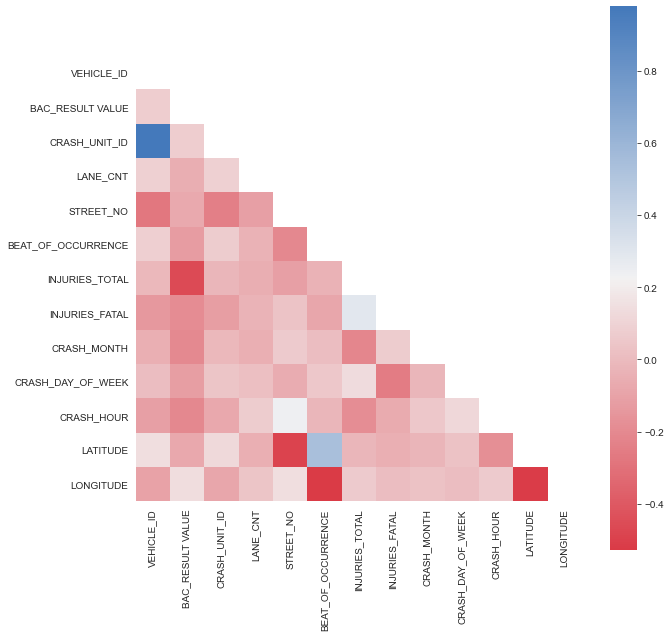

In [130]:
corr = fataldf.corr()
mask = np.triu(np.ones_like(corr,dtype = np.bool))
sns.set_style(style = 'white')
f,ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(10,250,as_cmap = True)
sns.heatmap(corr,mask=mask,cmap=cmap,
           square = True
           )

In [135]:
fataldf['MAKE'].value_counts().head(35)

CHEVROLET                           472
FORD                                457
HONDA                               267
NISSAN                              240
UNKNOWN                             206
DODGE                               181
JEEP                                169
TOYOTA MOTOR COMPANY, LTD.          163
TOYOTA                              146
CHRYSLER                            142
HYUNDAI                             107
GENERAL MOTORS CORPORATION (GMC)    101
BUICK                                79
PONTIAC                              75
INFINITI                             73
SATURN                               71
VOLKSWAGEN                           52
CADILLAC                             44
MITSUBISHI                           36
MAZDA                                35
SUZUKI                               34
LEXUS                                33
NEW FLYER                            32
BMW                                  31
GENERAL MOTORS CORP.                 27


In [136]:
fataldf.isnull().sum()

CRASH_RECORD_ID             0
VEHICLE_ID                647
CRASH_DATE_x                0
INJURY_CLASSIFICATION       0
AIRBAG_DEPLOYED           637
DRIVER_ACTION            1673
PEDPEDAL_ACTION          3759
BAC_RESULT VALUE         4346
CELL_PHONE_USE           4392
CRASH_UNIT_ID               0
CRASH_DATE_y                0
MAKE                      759
MODEL                     759
VEHICLE_TYPE              759
VEHICLE_DEFECT            759
FIRST_CONTACT_POINT       857
FIRE_I                   4271
CRASH_DATE                  0
WEATHER_CONDITION           0
LIGHTING_CONDITION          0
LANE_CNT                 3099
ROADWAY_SURFACE_COND        0
ROAD_DEFECT                 0
TRAFFICWAY_TYPE             0
STREET_NO                   0
STREET_NAME                 0
BEAT_OF_OCCURRENCE          0
WORK_ZONE_TYPE           4366
INJURIES_TOTAL              0
MOST_SEVERE_INJURY          0
INJURIES_FATAL              0
CRASH_MONTH                 0
CRASH_DAY_OF_WEEK           0
TRAFFICWAY